In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
precipitation = pd.read_csv('data_23.50_80.50.csv') # Read the CSV file of rainfall data of lat=23.5 and lon=80.5
precipitation.head()

,DateTime,23.5 80.5
0,1950-01-01,0.0
1,1950-01-02,0.0
2,1950-01-03,0.0
3,1950-01-04,0.0
4,1950-01-05,0.0


In [3]:
precipitation.dtypes

DateTime      object
23.5 80.5    float64
dtype: object

In [4]:
# The DateTime is object type, create date range and set as index and dropping given DateTime

precipitation.drop('DateTime',axis=1,inplace=True) # inplace=true ensures dataframe is dropped that column
date_range_rain = pd.date_range(start='1950-01-01', end='2023-12-31', freq='D')
precipitation.index = date_range_rain
precipitation.head()

,23.5 80.5
1950-01-01,0.0
1950-01-02,0.0
1950-01-03,0.0
1950-01-04,0.0
1950-01-05,0.0


In [5]:
# Reading temperature data for all given location
temp = pd.read_csv('IMD_Temperature_1951_2019.csv')
temp.head()

,DateTime,15.5 73.5,16.5 79.5,17.5 80.5,18.5 76.5,18.5 80.5,23.5 80.5,24.5 87.5,25.5 85.5,26.5 86.5
0,01-01-1951,30.24,29.96,28.45,27.91,28.41,21.56,25.02,23.60,24.17
1,02-01-1951,30.54,29.15,27.62,27.08,27.25,20.84,23.44,21.70,22.39
2,03-01-1951,29.67,28.54,26.96,27.12,26.52,21.64,23.61,21.93,22.87
3,04-01-1951,30.31,28.59,27.20,27.55,27.02,22.39,24.22,22.10,22.46
4,05-01-1951,29.85,28.95,27.77,28.56,27.78,23.22,24.81,23.36,23.65


In [6]:
# Reading temperature data for selected location lat=23.5 and lon=80.5
temp = temp['23.5 80.5']
date_range_temp = pd.date_range(start='1951-01-01', end='2019-12-31', freq='D')
temp.index = date_range_temp
temp.head()

1951-01-01    21.56
1951-01-02    20.84
1951-01-03    21.64
1951-01-04    22.39
1951-01-05    23.22
Freq: D, Name: 23.5 80.5, dtype: float64

### 1) Plot the mean climatology (Precipitation)

In [55]:
yearly_sum=precipitation.groupby(precipitation.index.year).sum()
yearly_sum

,23.5 80.5
1950,1297.8131
1951,1447.5909
1952,1573.7591
1953,1164.9137
1954,1117.8913
...,...
2019,1014.9015
2020,825.3628
2021,744.5059
2022,960.9981


In [52]:
yearly_sum.groupby(level=[0]).mean()

,23.5 80.5
1,22.424981
2,16.676270
3,12.280955
4,5.775503
5,7.683997
6,129.928789
7,337.567400
8,384.097007
9,194.346176
10,33.068343


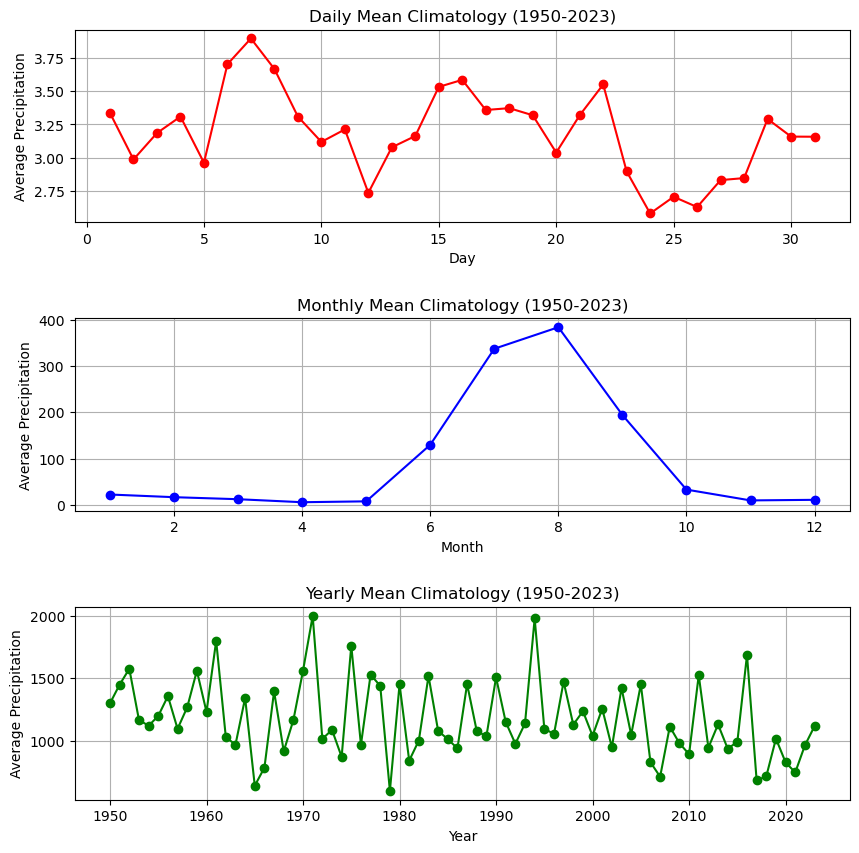

In [56]:
daily_mean_climatology = precipitation.groupby(precipitation.index.day).mean() # Daily average of rainfall (1-31)

monthly_yearwise_climatology = precipitation.groupby([precipitation.index.month,precipitation.index.year]).sum()
monthly_mean_climatology = monthly_yearwise_climatology.groupby(level=[0]).mean() # Monthly average of rainfall (1-12)


yearly_mean_climatology = precipitation.groupby(precipitation.index.year).sum() # Yearly average of rainfall (1950-2023)

fig,axes = plt.subplots(3,1,figsize=(10,10))

# Plot of daily average rainfall
axes[0].plot(daily_mean_climatology.index,daily_mean_climatology,'r',marker='o')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Average Precipitation')
axes[0].set_title('Daily Mean Climatology (1950-2023)')
axes[0].grid(True)

# Plot of monthly average rainfall
axes[1].plot(monthly_mean_climatology.index,monthly_mean_climatology,'b',marker='o')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Precipitation')
axes[1].set_title('Monthly Mean Climatology (1950-2023)')
axes[1].grid(True)

# Plot of yearly average rainfall
axes[2].plot(yearly_mean_climatology.index,yearly_mean_climatology,'g',marker='o')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Precipitation')
axes[2].set_title('Yearly Mean Climatology (1950-2023)')
axes[2].grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()

### 1) Plot the mean climatalogy (Temperature)

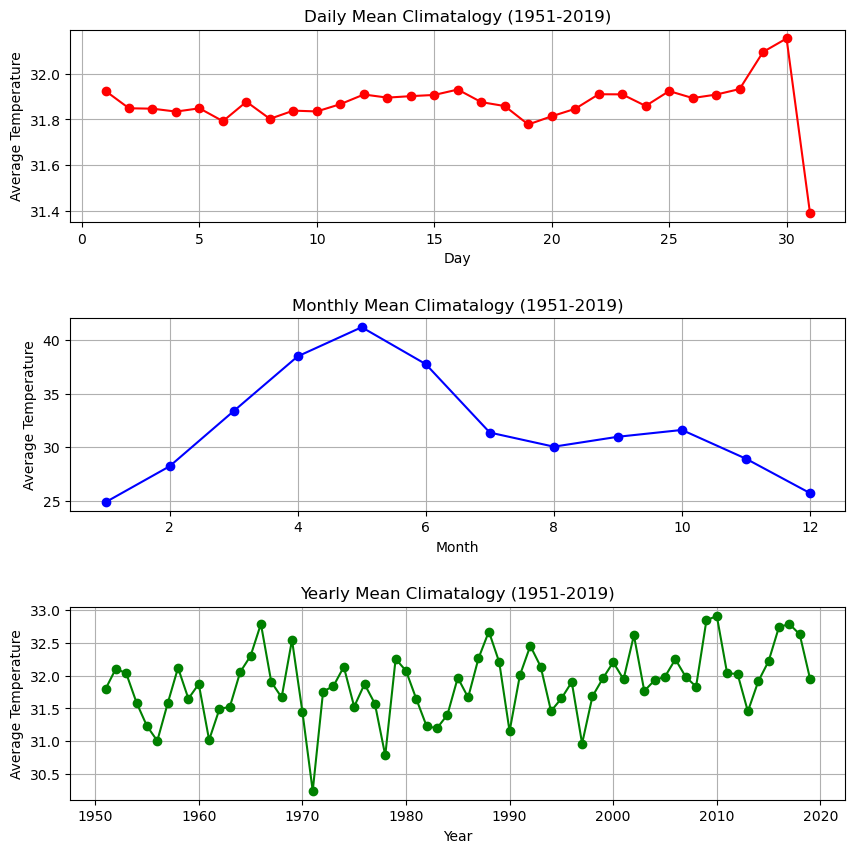

In [45]:
daily_mean_climatology = temp.groupby(temp.index.day).mean() # Daily average of temperature (1-31)
monthly_mean_climatology = temp.groupby(temp.index.month).mean() # Monthly average of temperature (1-12)
yearly_mean_climatology = temp.groupby(temp.index.year).mean() # Yearly average of temperature (1951-2019)

fig,axes = plt.subplots(3,1,figsize=(10,10))

# Plot of daily average temp
axes[0].plot(daily_mean_climatology.index,daily_mean_climatology,'r',marker='o')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Average Temperature')
axes[0].set_title('Daily Mean Climatalogy (1951-2019)')
axes[0].grid(True)

# Plot of monthly average temp
axes[1].plot(monthly_mean_climatology.index,monthly_mean_climatology,'b',marker='o')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Temperature')
axes[1].set_title('Monthly Mean Climatalogy (1951-2019)')
axes[1].grid(True)

# Plot of yearly average temp
axes[2].plot(yearly_mean_climatology.index,yearly_mean_climatology,'g',marker='o')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Temperature')
axes[2].set_title('Yearly Mean Climatalogy (1951-2019)')
axes[2].grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()

### 1a) What is the mean values and corresponding variance from each month (precipitation).

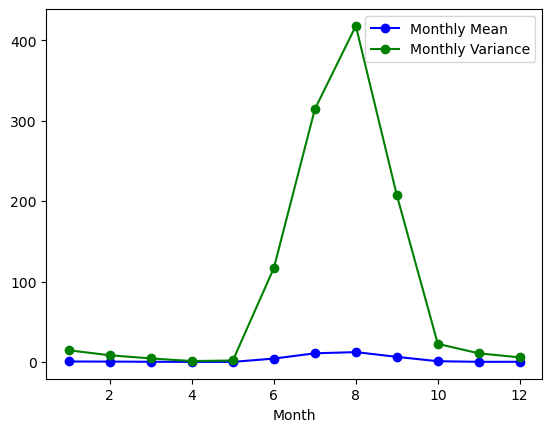

,Mean,Variance
1,0.723386,14.670767
2,0.590452,8.438391
3,0.396160,4.538144
4,0.192517,1.272378
5,0.247871,1.962186
6,4.330960,116.837411
7,10.889271,314.235722
8,12.390226,417.700049
9,6.478206,207.360671
10,1.066721,22.624021


In [46]:
monthly_mean_climatology = precipitation.groupby(precipitation.index.month).mean() # Monthly average of rainfall (1-12)
monthly_variance_climatology = precipitation.groupby(precipitation.index.month).var() # Monthly variance of rainfall (1-12)

plt.plot(monthly_mean_climatology.index,monthly_mean_climatology,'b',marker='o',label='Monthly Mean')
plt.plot(monthly_variance_climatology.index,monthly_variance_climatology,'g',marker='o',label='Monthly Variance')
plt.legend(loc=0)
plt.xlabel('Month')
plt.show()

mean_var = pd.concat([monthly_mean_climatology,monthly_variance_climatology],axis=1) # Concating two dataframes to one dataframe
mean_var.columns = ['Mean',"Variance"]
mean_var

### 1a) What is the mean values and corresponding variance from each month (temp).

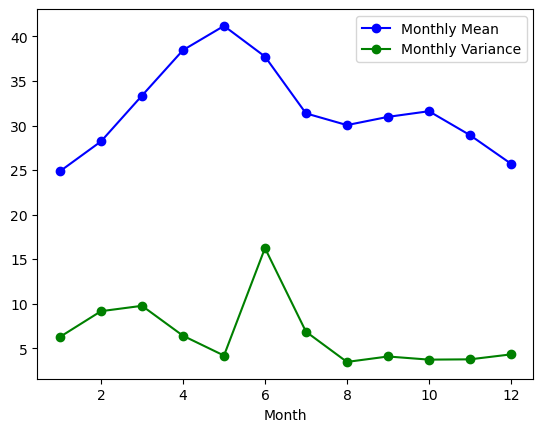

,Mean,Variance
1,24.869010,6.266398
2,28.217213,9.151406
3,33.360547,9.754524
4,38.467067,6.393779
5,41.185628,4.166605
6,37.745808,16.236794
7,31.363551,6.847790
8,30.048198,3.453543
9,30.972618,4.063576
10,31.606793,3.711388


In [47]:
monthly_mean_climatology = temp.groupby(temp.index.month).mean() # Monthly average of temp (1-12)
monthly_variance_climatology = temp.groupby(temp.index.month).var() # Monthly variance of temp (1-12)

plt.plot(monthly_mean_climatology.index,monthly_mean_climatology,'b',marker='o',label='Monthly Mean')
plt.plot(monthly_variance_climatology.index,monthly_variance_climatology,'g',marker='o',label='Monthly Variance')
plt.legend(loc=0)
plt.xlabel('Month')
plt.show()

mean_var = pd.concat([monthly_mean_climatology,monthly_variance_climatology],axis=1) # Concating two dataframes to one dataframe
mean_var.columns = ['Mean',"Variance"]
mean_var

### 2)Verify if there is any significant change in the climatology between the period from 1950-1980 and 1981-2010 (precipitation). 

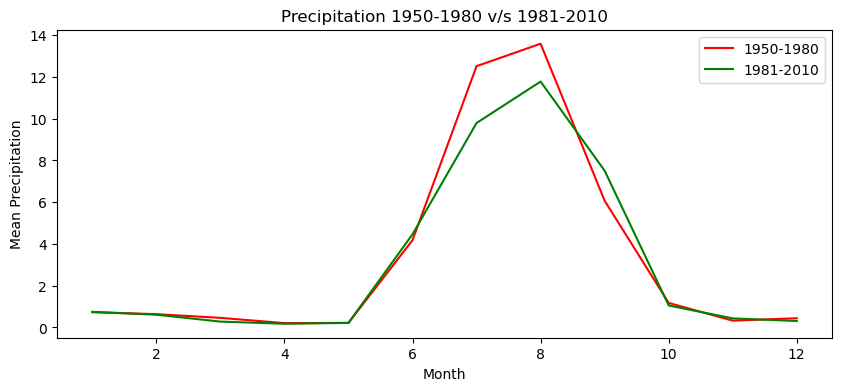

In [48]:
prec_1950_1980 = precipitation['1950-01-01':'1980-12-31'] # Reading data from 1950 to 1980
prec_1981_2010 = precipitation['1981-01-01':'2010-12-31'] # Reading data from 1981 to 2010

prec_1950_1980_monthly_avg = prec_1950_1980.groupby(prec_1950_1980.index.month).mean()
prec_1981_2010_monthly_avg = prec_1981_2010.groupby(prec_1981_2010.index.month).mean()

plt.figure(figsize=(10,4))
plt.plot(prec_1950_1980_monthly_avg.index,prec_1950_1980_monthly_avg,'r',label='1950-1980')
plt.plot(prec_1981_2010_monthly_avg.index,prec_1981_2010_monthly_avg,'g',label='1981-2010')

plt.xlabel('Month')
plt.ylabel('Mean Precipitation')
plt.title('Precipitation 1950-1980 v/s 1981-2010')
plt.legend()
plt.show()

In [49]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(prec_1950_1980_monthly_avg, prec_1981_2010_monthly_avg)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')


if p_value < 0.05:
  print('Significant difference is present')
else:
  print('Significant difference not is present')

T-statistic: [0.1421304]
P-value: [0.88827059]
Significant difference not is present


### 2)Verify if there is any significant change in the climatology between the period from 1950-1980 and 1981-2010 (temp).

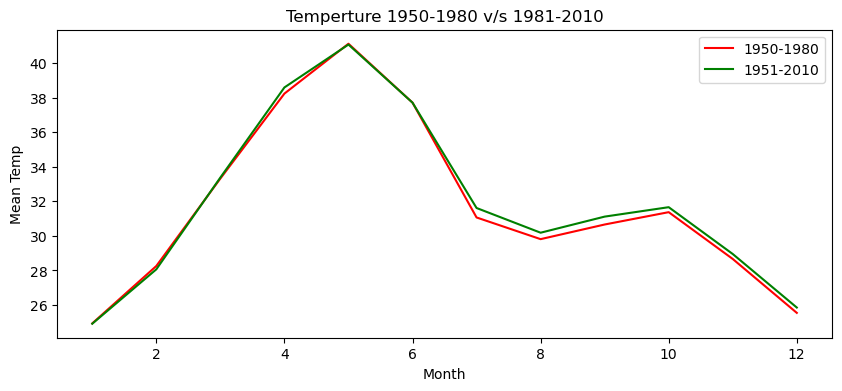

In [50]:
temp_1951_1980 = temp['1951-01-01':'1980-12-31'] # Reading data from 1950 to 1980
temp_1981_2010 = temp['1981-01-01':'2010-12-31'] # Reading data from 1981 to 2010

temp_1951_1980_monthly_avg = temp_1951_1980.groupby(temp_1951_1980.index.month).mean()
temp_1981_2010_monthly_avg = temp_1981_2010.groupby(temp_1981_2010.index.month).mean()

plt.figure(figsize=(10,4))
plt.plot(temp_1951_1980_monthly_avg.index,temp_1951_1980_monthly_avg,'r',label='1950-1980')
plt.plot(temp_1981_2010_monthly_avg.index,temp_1981_2010_monthly_avg,'g',label='1951-2010')

plt.xlabel('Month')
plt.ylabel('Mean Temp')
plt.title('Temperture 1950-1980 v/s 1981-2010')
plt.legend()
plt.show()

In [51]:
t_statistic, p_value = ttest_ind(temp_1951_1980_monthly_avg, temp_1981_2010_monthly_avg)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')


if p_value < 0.05:
  print('Significant difference is present')
else:
  print('Significant difference not is present')

T-statistic: -0.09789657816877642
P-value: 0.922900873596973
Significant difference not is present


### 3)Extract the maximum rainfall from each year and check for trend in max rainfall using MK Test.

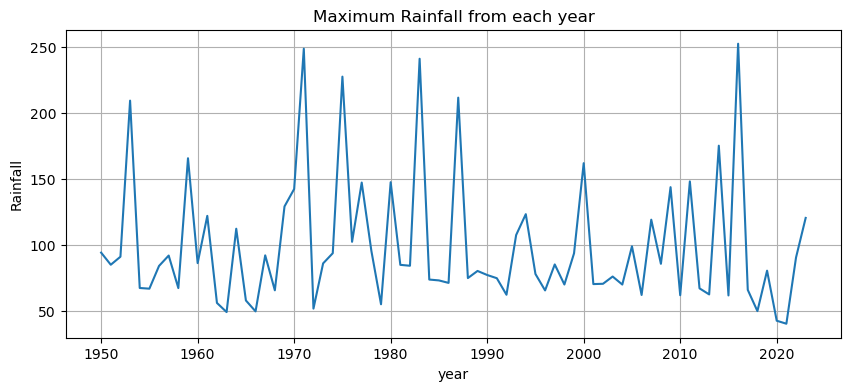

In [52]:
max_rainfall_year = precipitation.groupby(precipitation.index.year).max()

plt.figure(figsize=(10,4))
plt.plot(max_rainfall_year.index,max_rainfall_year)

plt.xlabel('year')
plt.ylabel('Rainfall')
plt.title('Maximum Rainfall from each year')
plt.grid(True)
plt.show()

In [53]:
pip install pymannkendall

Note: you may need to restart the kernel to use updated packages.


In [54]:
import pymannkendall as mk
print(mk.original_test(max_rainfall_year,alpha=0.05))

Mann_Kendall_Test(trend='no trend', h=False, p=0.24712916241404015, z=-1.157350565125585, Tau=-0.09218807848944835, s=-249.0, var_s=45917.0, slope=-0.20482758620689695, intercept=92.37210689655174)


In [55]:
print('From Mann-Kendall Test no trend observed in maximum rainfall from each year from 1950 to 2023')

From Mann-Kendall Test no trend observed in maximum rainfall from each year from 1950 to 2023


### 4)Calculate the total rainfall for each year and perform trend analysis. 

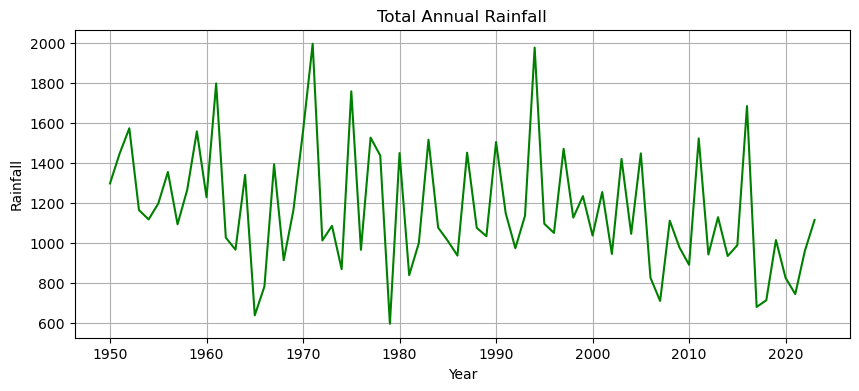

In [56]:
total_annual_rainfall =  precipitation.groupby(precipitation.index.year).sum()

plt.figure(figsize=(10,4))
plt.plot(total_annual_rainfall.index,total_annual_rainfall,'g')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('Total Annual Rainfall')
plt.grid(True)

In [57]:
import pymannkendall as mk
print(mk.original_test(total_annual_rainfall,alpha=0.05))

Mann_Kendall_Test(trend='decreasing', h=True, p=0.00541292139059002, z=-2.7813747452211643, Tau=-0.2210292484265087, s=-597.0, var_s=45917.0, slope=-3.9634950000000004, intercept=1248.4386175)


In [58]:
print('From Mann-Kendall Test decearsing trend observed in total annual rainfall from 1950 to 2023')

From Mann-Kendall Test decearsing trend observed in total annual rainfall from 1950 to 2023


### 5)Calculate the seasonal rainfall( JJAS, OND, JFM, AM) for each year and perform trend analysis 

In [59]:
precipitation.dtypes

23.5 80.5    float64
dtype: object

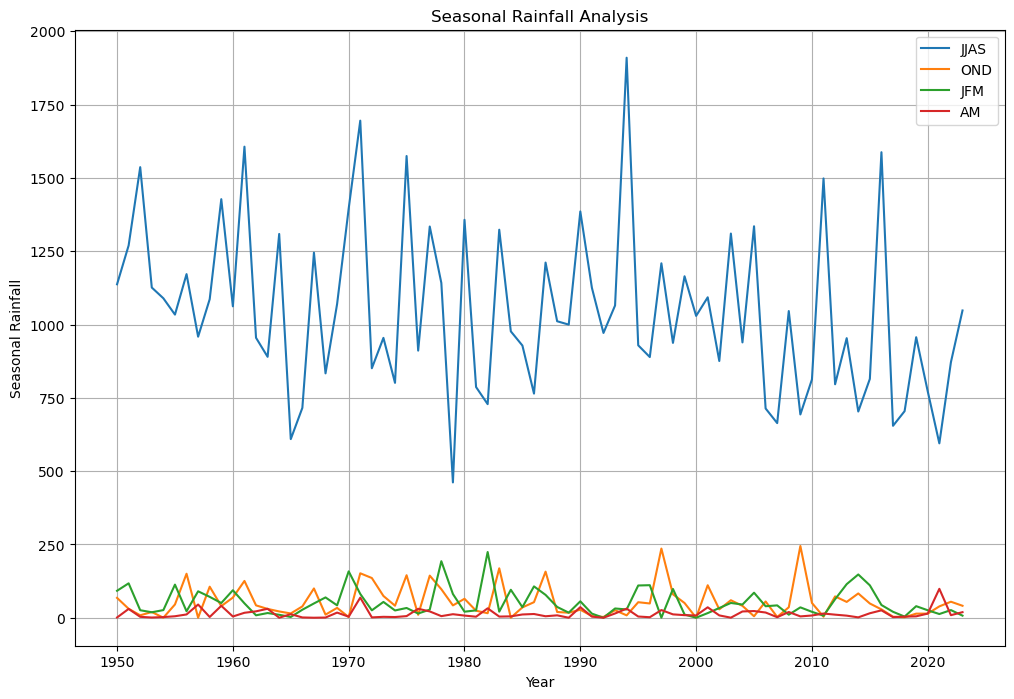

In [60]:
seasons = {'JJAS':(6,9),'OND':(10,12),'JFM':(1,3),'AM':(4,5)}

precipitation.index = pd.to_datetime(precipitation.index)

seasonal_rainfall = pd.DataFrame(index=precipitation.index.year.unique())

for season, (start_month, end_month) in seasons.items():
    season_data = precipitation[(precipitation.index.month >= start_month) & (precipitation.index.month <= end_month)]

    seasonal_rainfall[season] = season_data.groupby(season_data.index.year).sum()


plt.figure(figsize=(12, 8))
for season in seasons:
    plt.plot(seasonal_rainfall.index, seasonal_rainfall[season], label=season)

plt.xlabel('Year')
plt.ylabel('Seasonal Rainfall')
plt.title('Seasonal Rainfall Analysis')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
seasonal_rainfall

,JJAS,OND,JFM,AM
1950,1137.3295,67.7106,91.9475,0.8255
1951,1269.7221,30.5419,117.3152,30.0117
1952,1536.8451,8.2795,25.5734,3.0611
1953,1126.2006,19.4251,18.6001,0.6879
1954,1089.5109,0.1376,26.0372,2.2056
...,...,...,...,...
2019,956.8639,13.9101,39.3911,4.7364
2020,771.7775,14.0006,25.4452,14.1395
2021,594.6962,38.6676,12.5896,98.5525
2022,871.6689,54.5730,26.0365,8.7197


In [62]:
print(mk.original_test(seasonal_rainfall['JFM'], alpha=0.05))
print(mk.original_test(seasonal_rainfall['AM'], alpha=0.05))
print(mk.original_test(seasonal_rainfall['JJAS'], alpha=0.05))
print(mk.original_test(seasonal_rainfall['OND'], alpha=0.05))

Mann_Kendall_Test(trend='no trend', h=False, p=0.18973375574421292, z=-1.311367137899708, Tau=-0.10440577563865235, s=-282.0, var_s=45916.0, slope=-0.22081454545454546, intercept=43.74428090909091)
Mann_Kendall_Test(trend='no trend', h=False, p=0.21100623749264558, z=1.2508033359792365, Tau=0.09959274342835987, s=269.0, var_s=45908.333333333336, slope=0.05300625, intercept=5.914621875)
Mann_Kendall_Test(trend='decreasing', h=True, p=0.003811242455116659, z=-2.8933764128139625, Tau=-0.22991484635320253, s=-621.0, var_s=45917.0, slope=-4.252675675675674, intercept=1160.726212162162)
Mann_Kendall_Test(trend='no trend', h=False, p=0.5850562620471091, z=-0.5460140752109105, Tau=-0.04368752313957793, s=-118.0, var_s=45916.0, slope=-0.10348500000000001, intercept=43.838952500000005)


In [63]:
print('From Mann-Kendall_Test there is no trend in seasonal rainfall')

From Mann-Kendall_Test there is no trend in seasonal rainfall


### 6)Plot the Tmax for each year and see the trend over the last 70 years 

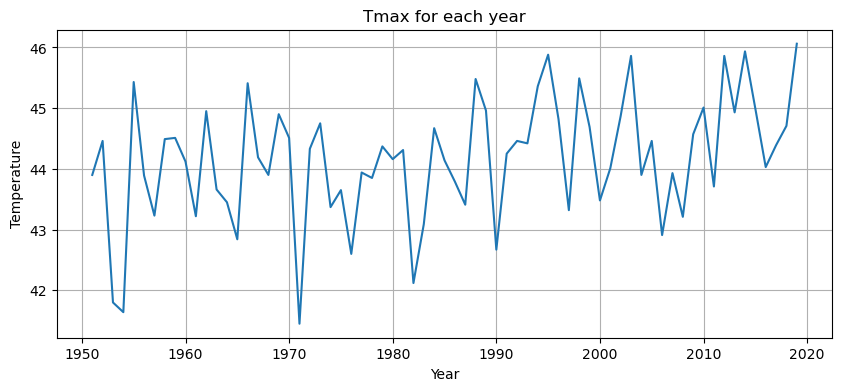

In [64]:
max_temp_year = temp.groupby(temp.index.year).max()

plt.figure(figsize=(10, 4))
plt.plot(max_temp_year.index,max_temp_year)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Tmax for each year')
plt.grid(True)
plt.show()

In [65]:
mk.original_test(max_temp_year,alpha=0.05)

Mann_Kendall_Test(trend='increasing', h=True, p=0.005071303109560832, z=2.802469374415459, Tau=0.2310315430520034, s=542.0, var_s=37266.0, slope=0.01644345238095226, intercept=43.690922619047626)

In [66]:
print('From Mann-Kendall Test there is increasing trend in Tmax for each year')

From Mann-Kendall Test there is increasing trend in Tmax for each year


### 7)Plot the T Min for each and analyse the trend over the 70 years 

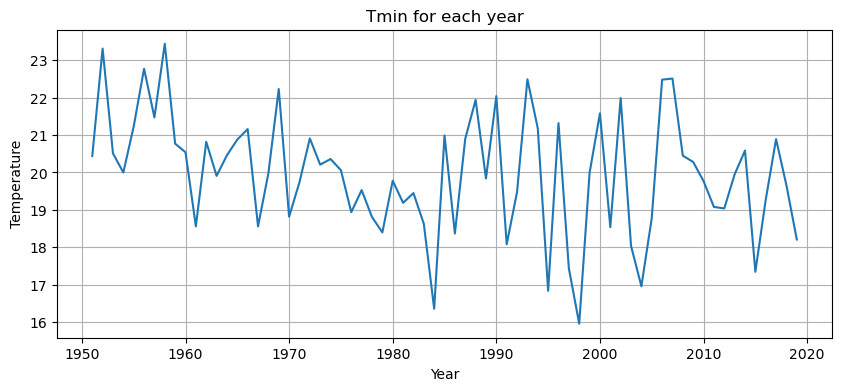

In [67]:
min_temp_year = temp.groupby(temp.index.year).min()

plt.figure(figsize=(10, 4))
plt.plot(min_temp_year.index,min_temp_year)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Tmin for each year')
plt.grid(True)
plt.show()

In [68]:
mk.original_test(min_temp_year,alpha=0.05)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.017680102369429962, z=-2.3722504389851604, Tau=-0.1956521739130435, s=-459.0, var_s=37274.333333333336, slope=-0.023414634146341484, intercept=20.78609756097561)

In [69]:
print('From Mann-Kendall Test there is decreasing trend in Tmin for each year')

From Mann-Kendall Test there is decreasing trend in Tmin for each year


### 8)Calculate the no of rainy days in a year and check if there any trend in the no. of rainy days. (Rainy day with precipitation greater than 2.5mm)

In [70]:
minimal = 2.5
rainy_days_yearwise = (precipitation>minimal).groupby(precipitation.index.year).sum()
rainy_days_yearwise

,23.5 80.5
1950,71
1951,72
1952,74
1953,62
1954,67
...,...
2019,75
2020,70
2021,59
2022,66


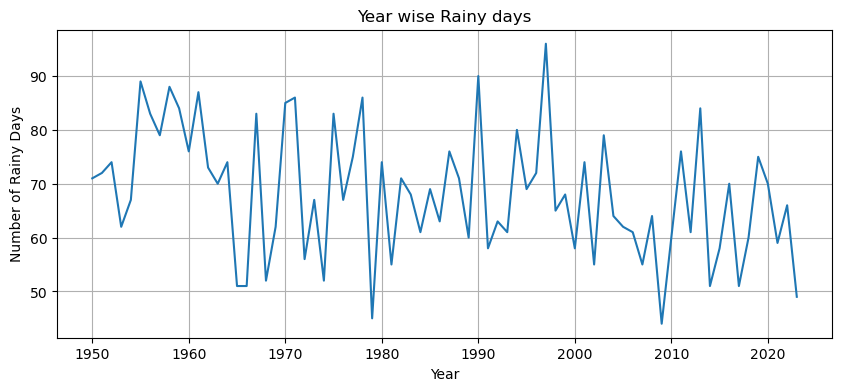

In [71]:
plt.figure(figsize=(10, 4))
plt.plot(rainy_days_yearwise.index,rainy_days_yearwise)
plt.xlabel('Year')
plt.ylabel('Number of Rainy Days')
plt.title('Year wise Rainy days')
plt.grid(True)
plt.show()

In [72]:
mk.original_test(rainy_days_yearwise,alpha=0.05)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0033077943957668943, z=-2.9375850392543805, Tau=-0.2332469455757127, s=-630.0, var_s=45848.0, slope=-0.2, intercept=75.3)

In [73]:
print('From Mann-Kendall Test there is decreasing trend in year wise rainy days')

From Mann-Kendall Test there is decreasing trend in year wise rainy days
